#               Project 1: To Brake ir Not to Brake?

### Chris Ogunsami ASU PHY432 Computational Methods in Physics

### February 28, 2025

## 2. Background

In [4]:
from IPython.display import Image

During this project, we were tasked to analyze the motion of a car approaching an intersection at 55 kilometers per hour. At any given distance from the intersection, the driver notices the traffic light change from green to yellow. Given a three second period between the moment the light changes from green to red, the driver has to decide whether to slow down before the intersection or continue driving at the same initial speed. In the process of making that decion, the driver will take $\delta = 0.8 $ seconds to react. Our task is to predict her position and velocity over time and determine what approach distances are considered safe or dangerous given an initial velocity. Finally, we determine at what range of approach distances(the "dilenma zone" that would be considered dangerous for the driver were to react at.

Newton's kinematic equations of motion were used to model the change in the car's speed V(t) and position x(t) over time. 

$Brake:$

$\begin{equation}
 v(t) =
   \left\{\begin{array}{lr}
       V_o, & 0 < t \le \delta \\
       V_o + a(t-\delta), & \delta < t \le \tau \\
       0, & t > \tau
    \end{array}\right.
 \end{equation}$

 $\begin{equation}
 x(t) =
   \left\{\begin{array}{lr}
       x_o + V_o(\delta - t), & 0 < t \le \delta \\
       x_o + V_o\delta + a(t-\delta)^2/2, & \delta < t \le \tau \\
       x_f, & t > \tau
    \end{array}\right.
 \end{equation}$

$Drive:$

$\begin{equation}
V(t) = V_o
\end{equation}$

 $\begin{equation}
 x(t) =
   \left\{\begin{array}{lr}
       x_o + V_ot, & 0 < t \le \delta \\
       x_o + V_o(\delta + t), & \delta < t \le \tau \\
       x_f, & t > \tau
    \end{array}\right.
 \end{equation}$

As you may have noticed, I have introduced a $\delta$ time constant into these expressions. The problem states that the driver takes approximately 0.8 seconds from the moment they see the traffic light change to yellow to the moment they decide whether they will continue driving or slow down before they reach the intersection. What $\delta$ does is it shifts the original functions by an amount. Hence, V(t) -> V(t + $\delta$) and x(t) -> x(t + $\delta$). Itis convenient to treat these kinematic equations as step functions in this scenario.



## 3: Results and Discussion

### 3.1: Testing the Model

The equations of motion were integrated into python code with their plots shown below in Figures 1-3. The velocity and position were plotted over a period of 7 seconds. The grey zone on the plot of x(t) indicates the width of the intersection. The dashed red line indicates $\tau$ or the point in time where the traffic light switches to red.

<div>
<img src="x0=-30.png" width="500"/>
</div>
Figure 1: Time series for v(t) and x(t) for x0=-30m. This situation is dangerous for the driver because whether they choose to drive or brake, they will still end up in the intersection(grey zone) when the traffic light switches to red. 

<div>
<img src="x0=-70.png" width="500"/>
</div>
Figure 2: Time series for v(t) and x(t) for x0=-70m. This situation is safe for the driver as long as they decide to brake seeing as they will stop approximately 20 meters from the intersection. It would be dangerous if they were to continue driving after 3 seconds.

<div>
<img src="x0=-0.5.png" width="500"/>
</div>
Figure 3: Time series for v(t) and x(t) for x0=-0.5m. This situation is safe for the driver regardless of their decision because they will pass the intersection whether they decide to brake or continue driving.

### 3.2 Classification

Once the position and velocities were modeled above, next I classified whether a given approach distance at our initial velocity was safe or dangerous. The following algorithm below was used.

In [160]:
def outcome(x0, ti, tau, dt, W, v0=15):
    tmax = 2*tau
    t = np.arange(0, tmax, dt)

    x_drive = drive_x(v0, t, x0, delta=ti)
    v_drive = v0*np.heaviside(t, 1)
    v_break = brake_v(v0, t, delta=ti)
    x_break = brake_x(v0, t, x0, delta=ti)

    i_tau = np.where(t == tau)[0]
    #Option: Drive(x>W for t>tau)
    if x_drive[i_tau+1] > W or x_break[i_tau-1] < 0:
        return 1
    else:
        return 0

For this problem, it is given that if the decision to drive was made and the position of the car after 3 seconds  was found to be past the intersection(x>W) or if the decision to brake was made and the car stopped before the intersection(x<0) then the situation was safe. In this algorithm, I utilized the time values for both "just before" and "just after" the traffic light switches to red. I believe this algoritm is consistent with Figures 1-3.

Next, I iterated through my classification function above to determine a "danger zone" of x0 for our given initial velocity.

<div>
<img src="Classification.png" width="500"/>
</div>
Figure 4: This figure indicates which locations are considered dangerous to be approaching the traffic light at our initial velocity.

The following code was used to numerically determine x0A,x0B, and the dilenma zone s.

In [141]:
last = np.where(y == 0)[0][-1]
x0A = x0[last]
x0A

-15.100000000004826

In [140]:
first = np.where(y == 0)[0][0]
x0B = x0[first]
x0B

-37.70000000000354

In [163]:
s = abs(x0A - x0B)
s

22.599999999998715

A numerical fuction was developed for the dilemna zone as a function of initial speed.

In [165]:
def s(v0):
    return W - tau*v0 - (v0*v0)/(2*a)

### 3.3 Analytical Solution

Next, the dilenma zona was solved analytically. First, if the decision is to continue driving, the car will be moving at the initial velocity which is the speed limit for the road. 

$$ \Delta x = V_o \tau $$

The end of the intersection is located at x=+30 m. Therefore, the total displacement needed to reach the traffic light and cross the intersection is $$ W + x_o $$. Therefore,

$$ \Delta x = W - x_o = V_o \tau$$
$$ -> x_o^A = W - V_o \tau = 30 - (15)(3) = -15  $$

Using the following kinematic equation, $x_o^B$ was found to be:

$$ V^2 = V_o^2 -2a\Delta x $$
$$ x_o^B = V_o^2 / 2a = -37.5 $$

Finally, our dilenma zone was found to be:

$$ s = abs(x_o^A - x_o^B) $$ or $$ [-37.5, -15] $$

The dilenma zone as a function of $V_o$ was also solved analytically:
$$ s(V_o) = W - \tau V_o - v_o^2 / 2a $$

# 4. Summary

#### In conclusion, our analytical results and numerical results differ slightly but are close. If we consider our anlytical results to be the "true value", then we would have a 0.66% error for $x_o^A$, 0.53% error for $x_o^B$, and 0.44% error for s. The differences can be attributed to computer round-off error from an improperly chosen precision value for calculations. Numerical results may also have been influenced by the step size chosen when iterating over a range of data.

# 5. References

1. Numpy Heaviside. url: https://numpy.org/doc/2.1/reference/generated/numpy.heaviside.html

# 6. Appendix

# Code

Functions

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#functions for v(t) and x(t)
def brake_v(v0, t, a=-3, delta=0.8):
#                           0   if t-delta  < 0
#heaviside(t-delta, t) =    t   if t-delta == 0
#                           1   if t-delta  > 0
    t1 = np.heaviside(delta-t, 1)
    v1 = v0*t1
    #Add deceleration component here
    delta2 = delta*np.heaviside(t-delta, 0)
    t2 = t*np.heaviside(t-delta, 0) - delta2
    v2 = v0*np.heaviside(t-delta, 0) + a*t2
    #put it all together
    v = v1+v2
    v = v*np.heaviside(v, v)
    return v

def brake_x(v0, t, x0, a=-3, delta=0.8):
    #Begin with t<delta. x should increase by the same increment here
    t1 = np.heaviside(delta-t, 1)
    x1 = x0*t1 + (v0*t1)*t
    v = brake_v(v0, t)
    del_v = v - v0*np.heaviside(t, 1)
    #Add deceleration component here. Start with time
    t2 = t*np.heaviside(t-delta, 0) - delta*np.heaviside(t-delta, 0)
    brake = np.where(t == delta)[0]
    x2 = x1[brake]*np.heaviside(t-delta, 0) + v0*t2 + 0.5*a*(t2**2)
    x3 = x1+x2
    #Insert stopping point. This is when V=0 or the car comes to a stop.
    #Replace the displacements beyond the stopping point with xstop
    stop = np.where(v == 0)[0]
    stop = stop[0]
    rest = x3[stop]
    xf1 =  x3*np.heaviside(t[stop]-t, 1)
    xf2 = rest*np.heaviside(t-t[stop], 0)
    xf = xf1+xf2
    return xf

def drive_x(v0, t, x0, delta=0.8):
    t1 = np.heaviside(delta-t, 1)
    x1 = (x0 + v0*t)*t1
    t2 = t*np.heaviside(t-delta, 0) - delta*np.heaviside(t-delta, 0)
    i = np.where(t == delta)[0]
    x2 = x1[i]*np.heaviside(t-delta, 0) + v0*t2
    return x1+x2

Test values

In [25]:
t = np.arange(0, 7, 0.1)

x0 = -30
v0 = 15.0
tau = 3
W = 30

v_brake = brake_v(v0, t)
v_drive = v0*np.heaviside(t, 1)
x_brake = brake_x(v0, t, x0)
x_drive = drive_x(v0, t, x0)

Plots

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle(f"Motion of car for x0 = {x0} m")

axes[0].plot(t, v_brake, 'b', label='brake') 
axes[1].plot(t, x_brake, 'b', label='brake')
axes[0].plot(t, v_drive, 'r', label='drive')
axes[1].plot(t, x_drive, 'r', label='drive')
axes[0].plot([tau, tau], [x0, 1.05*W], "--", color="red", lw=1)
axes[1].fill_between([0, 7], [W, W], color="black", alpha=0.3)
axes[1].plot([tau, tau], [x0, 1.05*W], "--", color="red", lw=1)

axes[0].set_xlim(0, 6.9)
axes[0].set_ylim(0, v0+10)
axes[0].set_xlabel("time t (s)")
axes[0].set_ylabel("speed v(t) (m/s)")
axes[0].legend(loc="best")   
axes[1].set_xlabel("time t (s)")
axes[1].set_ylabel("position x(t) (m)")
axes[1].set_ylim(x0, 80)
axes[1].set_xlim(0, 6.9)
axes[1].legend(loc="best")
plt.tight_layout()
plt.savefig(f"x0={x0}.png")
plt.close()

c) Classification algorithm

In [134]:
def outcome(x0, ti, tau, dt, W, v0=15):
    tmax = 2*tau
    t = np.arange(0, tmax, dt)

    x_drive = drive_x(v0, t, x0, delta=ti)
    v_drive = v0*np.heaviside(t, 1)
    v_break = brake_v(v0, t, delta=ti)
    x_break = brake_x(v0, t, x0, delta=ti)

    i_tau = np.where(t == tau)[0]
    #Option: Drive(x>W for t>tau)
    if x_drive[i_tau+1] > W or x_break[i_tau-1] < 0:
        return 1
    else:
        return 0

d) Dilemma zone

In [138]:
x0 = np.arange(-100, 0, 0.1)
ti = 0.8
tau = 3
dt = 1e-3
W = 30
y = np.array([])
for i in x0:
    y = np.append(y,outcome(i, ti, tau, dt, W))


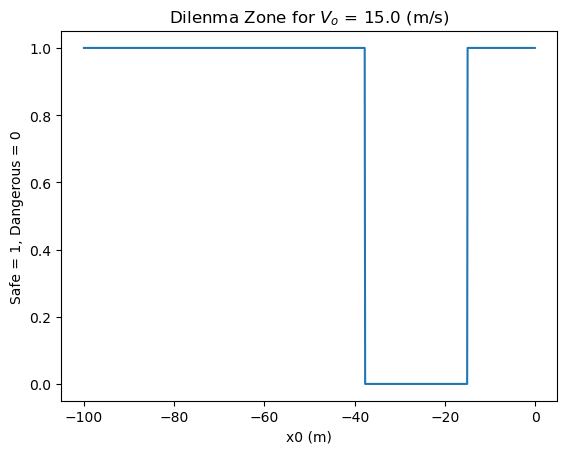

In [164]:
plt.plot(x0,y)
plt.xlabel("x0 (m)")
plt.ylabel("Safe = 1, Dangerous = 0")
plt.title(f"Dilenma Zone for $V_o$ = {v0} (m/s)")
plt.savefig("Classification.png")